# Exercise 03.b: Stability of the oscillation equation

**Due:** _15 December 2020_

**Names:** Linus, Lukas, Mariana, David

Considering the following oscillation equation
$$\frac{{\rm d}q}{{\rm d}t}+i f q = 0$$
where $f$ is the Coriolis parameter. Its analytic solution is $q=q_{0} {\rm e}^{-ift}$.

1. Discretize the oscillation equation using forward Euler, backward Euler and leap-frog schemes and analyse their stability, respectively.

1. With initial value $q_0 = {\rm e}^{i{\pi}/4}$, and $f=10^{-4}s^{-1}$ and $\Delta t=100s$, attempt to solve the oscillation equation by forward Euler, backward Euler and leap-frog schemes, respectively. Integrate the numerical equations for about ten periods of oscillation and compare the numerical solutions with analytic solution.

1. Take $\Delta t=200, 500 \text{ and } 1000s$, repeat the integration, and compare them with analytic solution.


## 1.)

## Forward Euler:
Discretizing the oscillation equation with forward euler, we start with

\begin{align}
\frac{q^{n+1}-q^{n}}{\Delta t}+i f q^{n} &= 0 \\
q^{n+1} &= q^{n} - i \Delta t f q^{n} \\
q^{n+1} &= \underbrace{(1 - i \Delta t f)}_{\lambda} q^{n} \\
\end{align}

Since $Im(f)=Im(\Delta t)=0$ it follows, that

$$|\lambda| = |1-i f \Delta t| > 1$$

for all real and nonzero $f$ and $\Delta t$. The forward Euler scheme is (almost) always unstable for the oscillation equation.

## Backward Euler:
A similar approach for the backward Euler method gives

\begin{align}
\frac{q^{n+1}-q^{n}}{\Delta t}+i f q^{n+1} &= 0 \\
q^{n+1} + i \Delta t f q^{n+1} &= q^{n} \\
q^{n+1} &= \underbrace{\frac{1}{(1 + i \Delta t f)}}_{\lambda} q^{n} \\
\end{align}

With the same argumentation as for the forward Euler, the absolute of the denominator is always larger than 1, so that

$$|\lambda| = \frac{1}{|1-i f \Delta t|} < 1$$

for real and nonzero $f, \Delta t$. The method is (almost) always damping for the oscillation equation.

## Leapfrog:
The Leapfrog scheme is a three level scheme, providing us with two solutions for $\lambda$:

\begin{align}
\frac{q^{n+1}-q^{n-1}}{2 \Delta t}+i f q^{n} &= 0 \\
q^{n+1} + i 2 \Delta t f q^{n} - q^{n-1}  &= 0 \\
\end{align}

Substituting $q^{n}=\lambda^{n}q^{0}$ and dividing by $\lambda^{n-1}q^{0}$ leaves

$$\lambda^{2}+i 2 \Delta t f \lambda -1 = 0$$

Identifying $\Delta t f$ as $q \sin (k\Delta x) = \sigma$ in the respective term of 3 a) 1. we can shorten this notebook by refering to the explicit solution presented there. The resulting condition for stability is 

$$ |\Delta t f| \le 1$$

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## 2.)

In [14]:
#Inititializing 
f   = 0.0001                 #s⁻¹
q0  = np.exp(np.pi*0.25j)
RHS = -f*1j                  
q = Linear_Solver(RHS,q0)

# Forward Euler

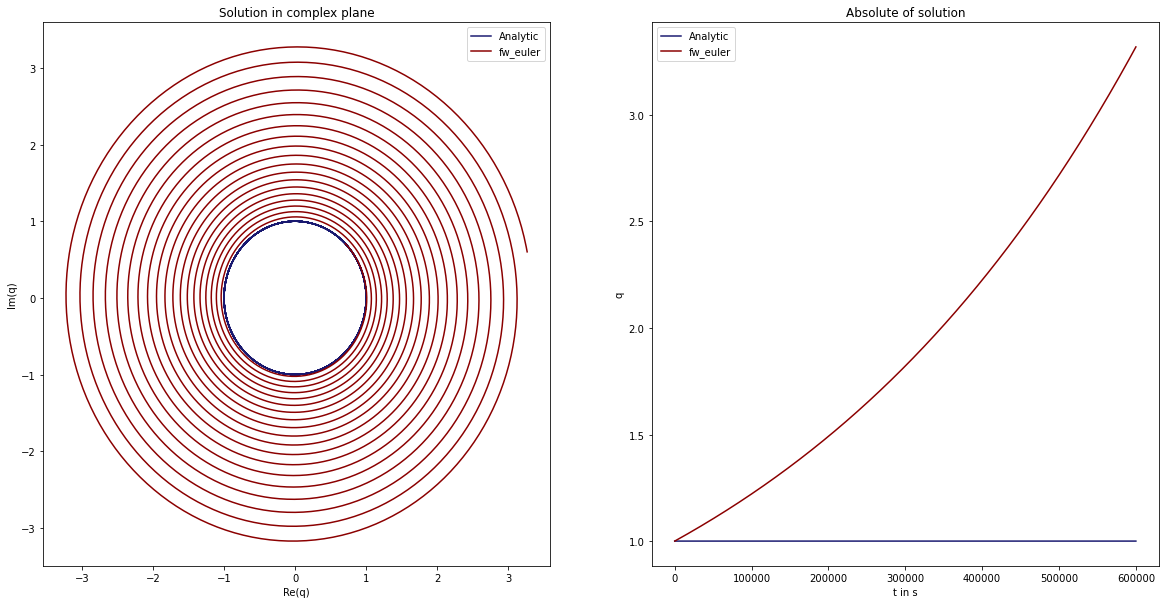

In [15]:
q.solve(method='fw_euler')
q.plot_sol()

# Backward Euler

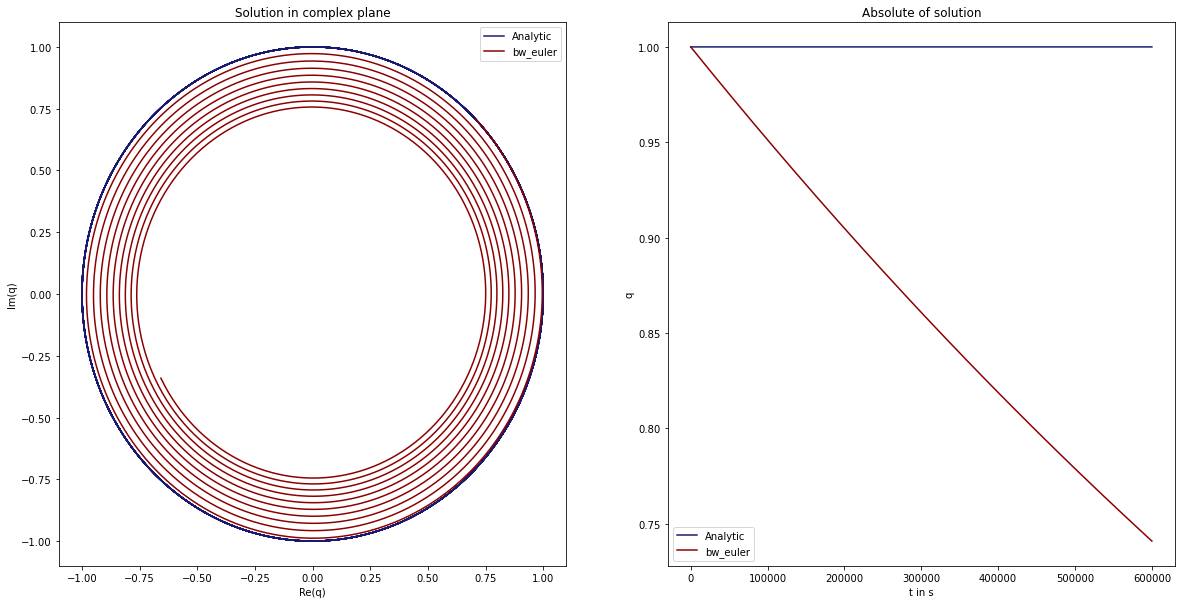

In [6]:
q.solve(method='bw_euler')
q.plot_sol()

# Leapfrog

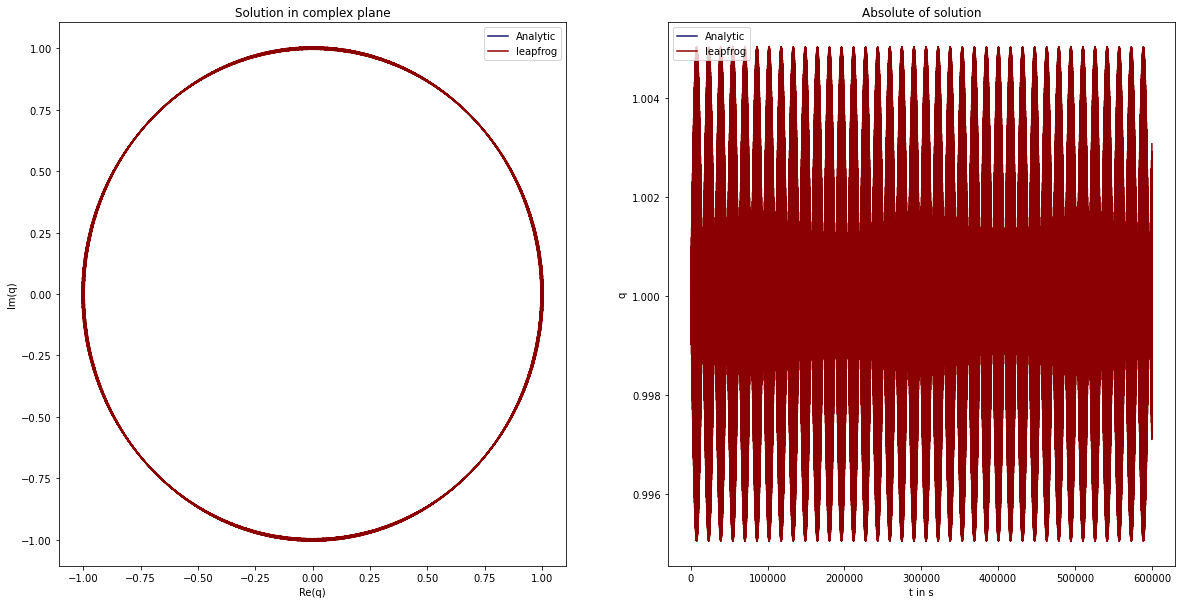

In [7]:
q.solve(method='leapfrog')
q.plot_sol()

The three different schemes show the expected characteristics. The forward Euler method is unstable, with a growing amplitude in time in comparison with a constant amplitude for the analytic solution. The backward Euler scheme is damping, yielding a decreasing amplitude in time. 
The Leapfrog scheme is neutral, the physical mode stays constant and in accordance with the analytic solution. However an additional computational mode is visible due to the fact, that a second initial condition was calculated numerically to apply the scheme. The amplitude of this mode is comparable small, limited to $5\cdot 10^{-3}$.

## 3.)

# $\Delta t = 200$:

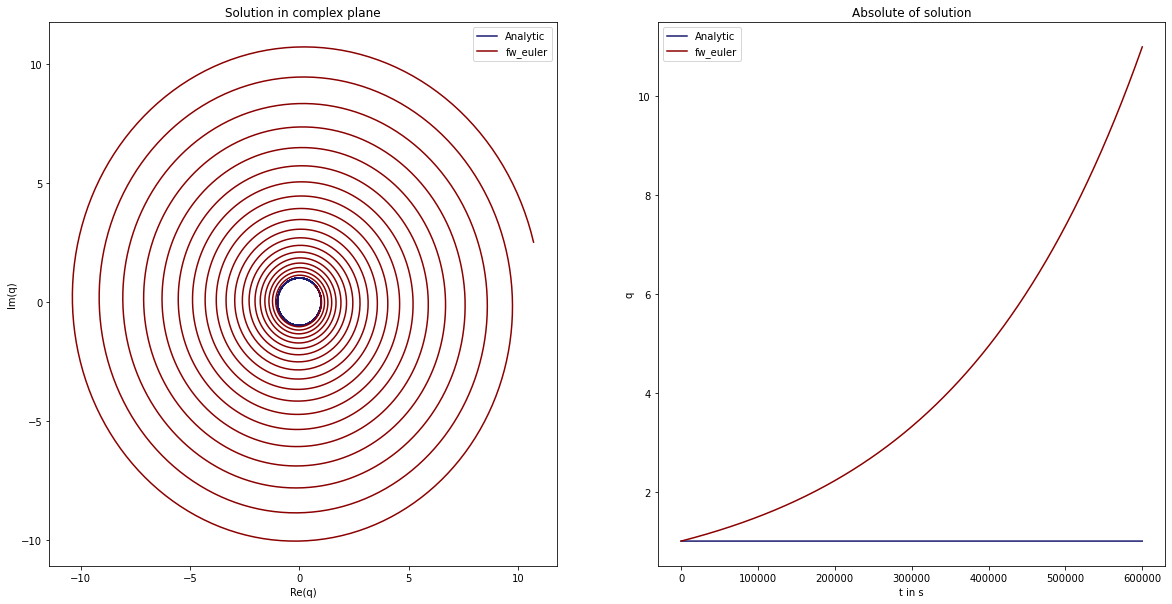

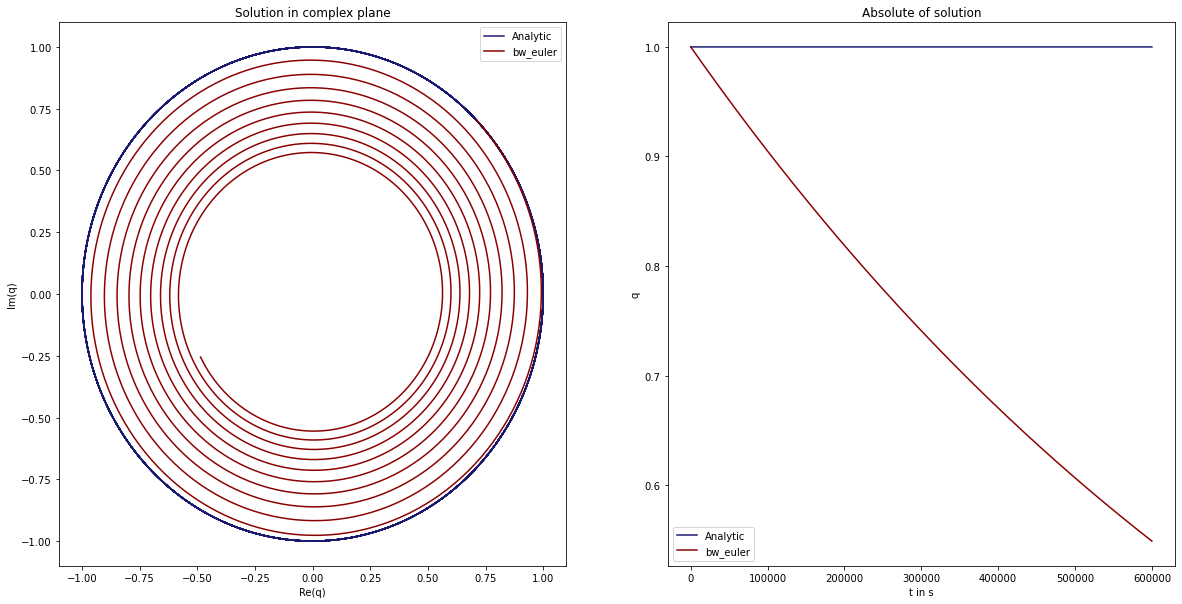

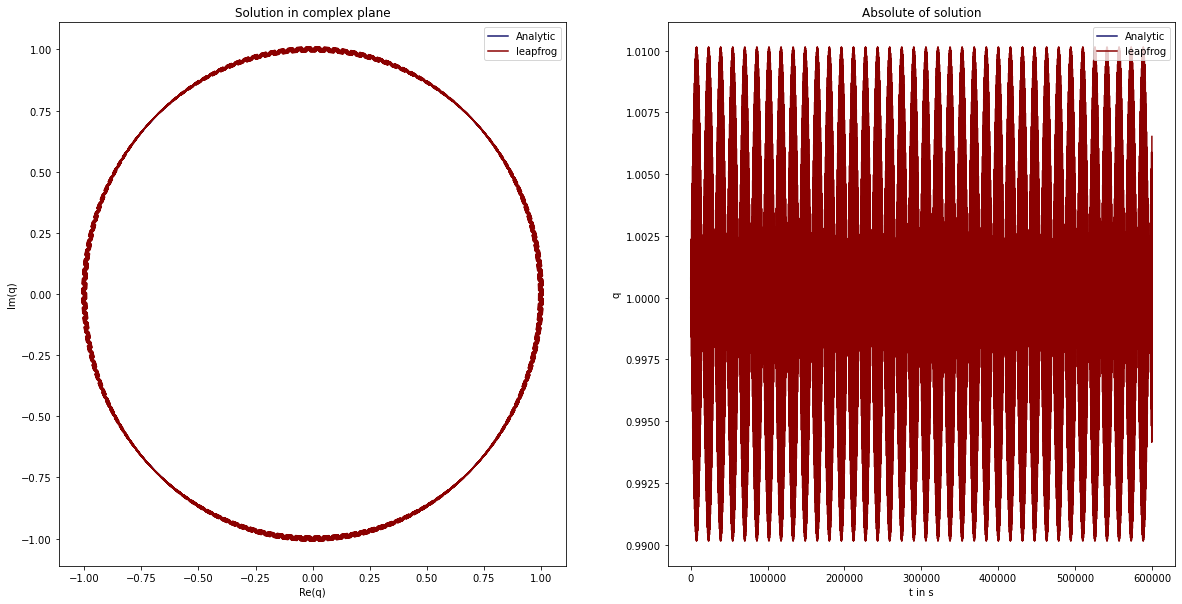

In [9]:
q.dt = 200
q.N  = int(600000/q.dt)
q.solve(method='fw_euler')
q.plot_sol()
q.solve(method='bw_euler')
q.plot_sol()
q.solve(method='leapfrog')
q.plot_sol()

# $\Delta t = 500$:

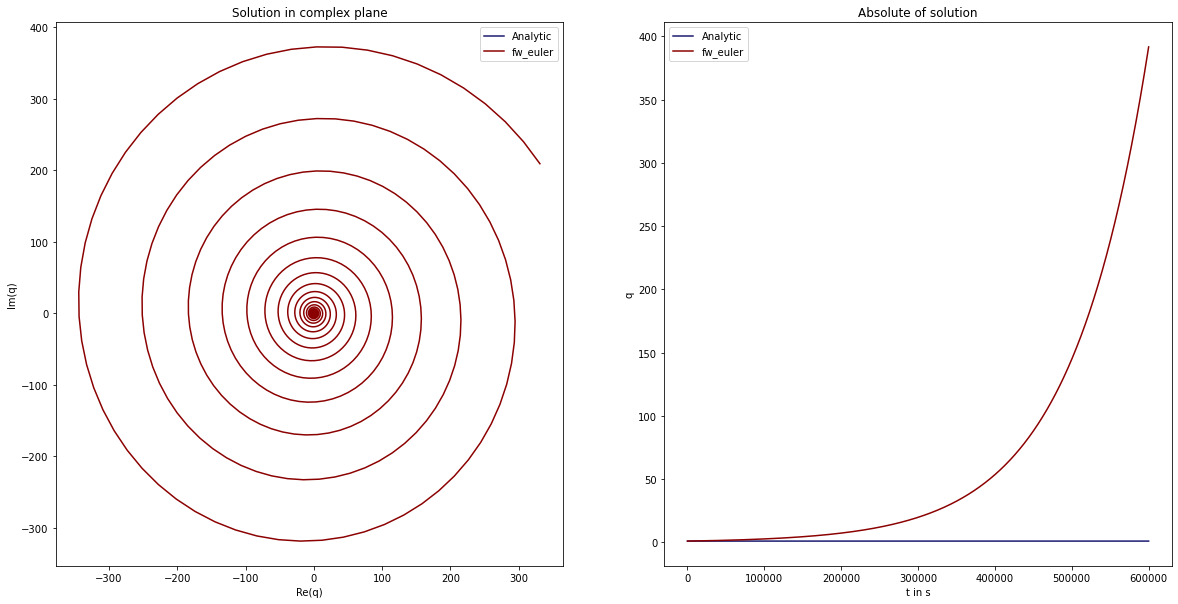

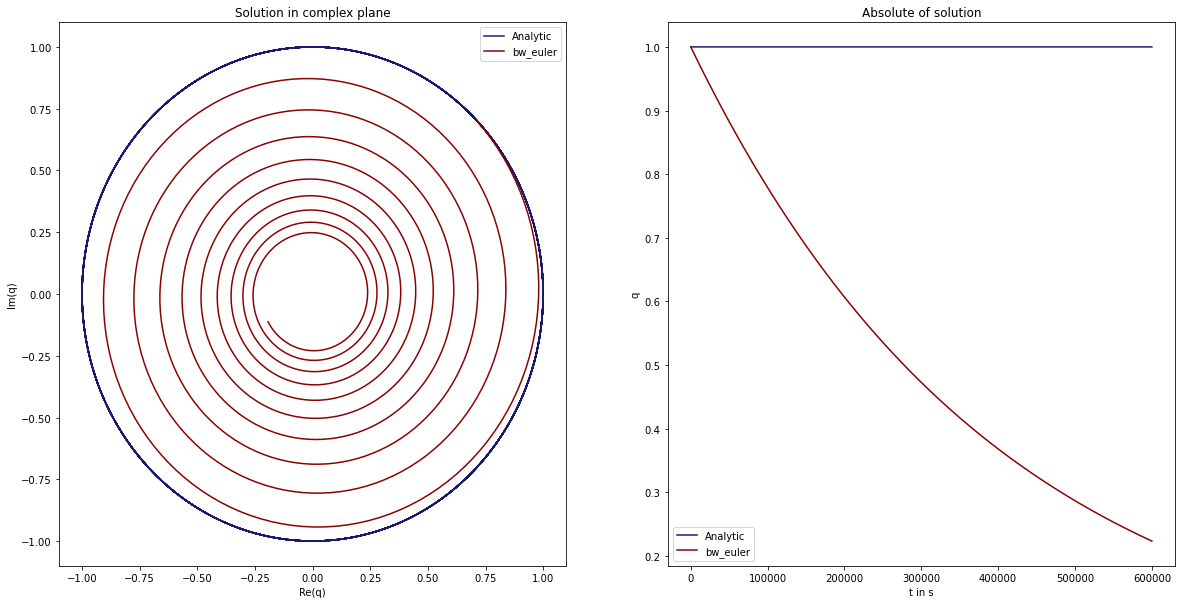

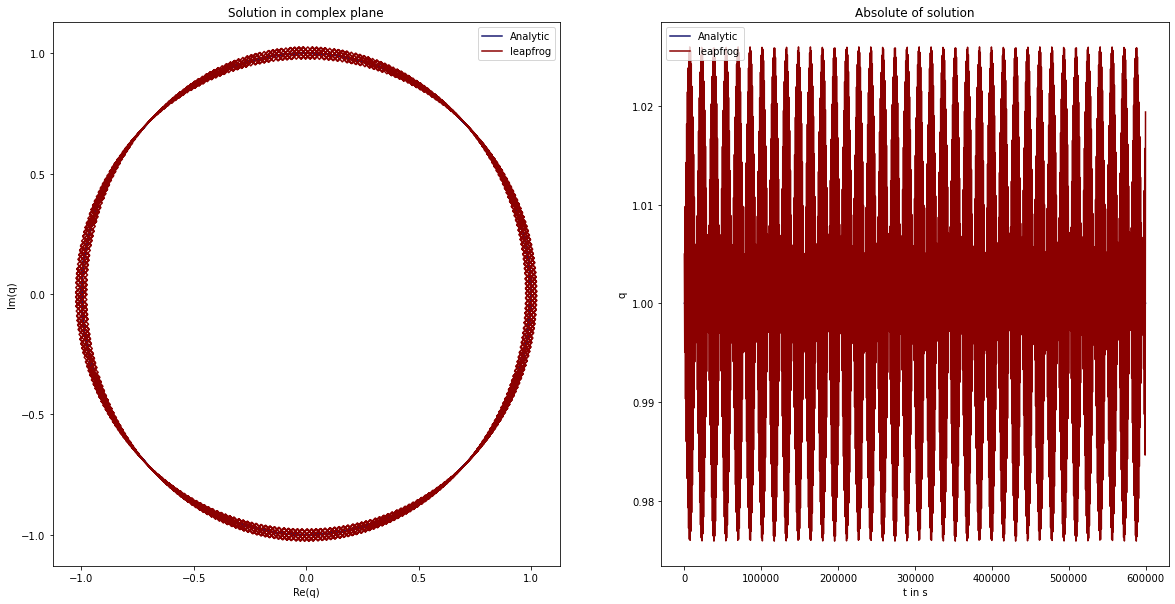

In [10]:
q.dt = 500
q.N  = int(600000/q.dt)
q.solve(method='fw_euler')
q.plot_sol()
q.solve(method='bw_euler')
q.plot_sol()
q.solve(method='leapfrog')
q.plot_sol()

# $\Delta t = 1000$:

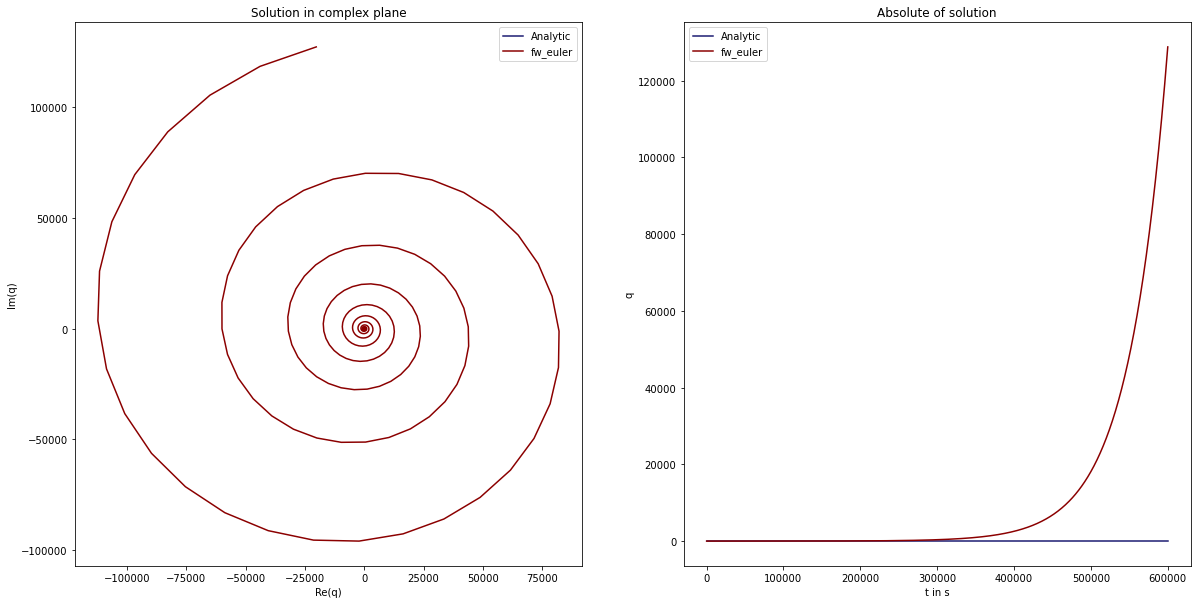

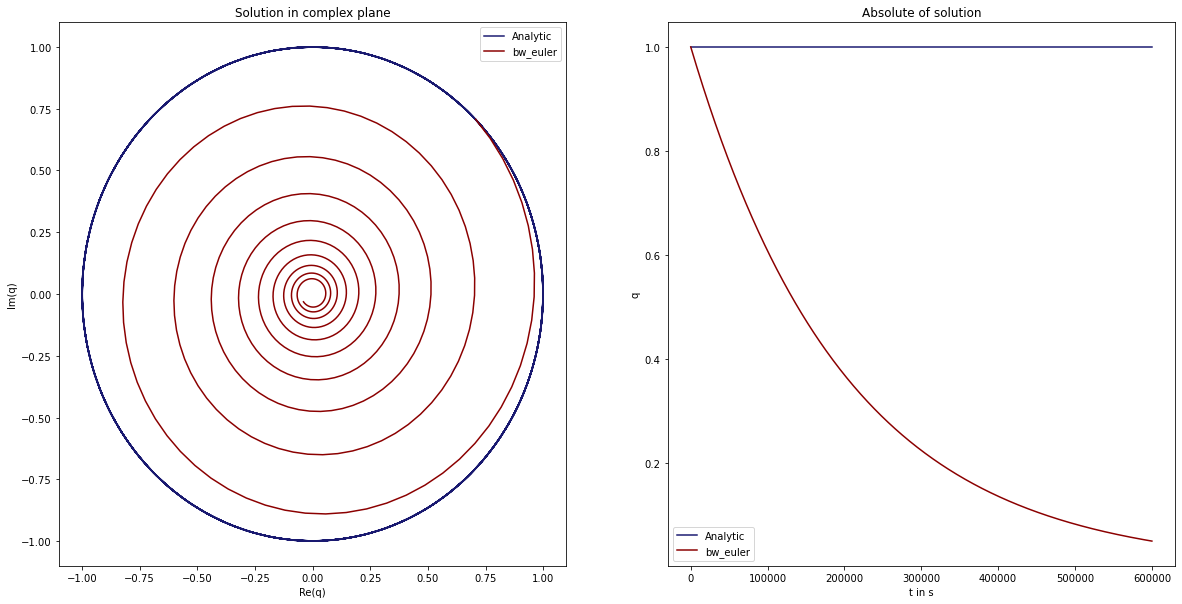

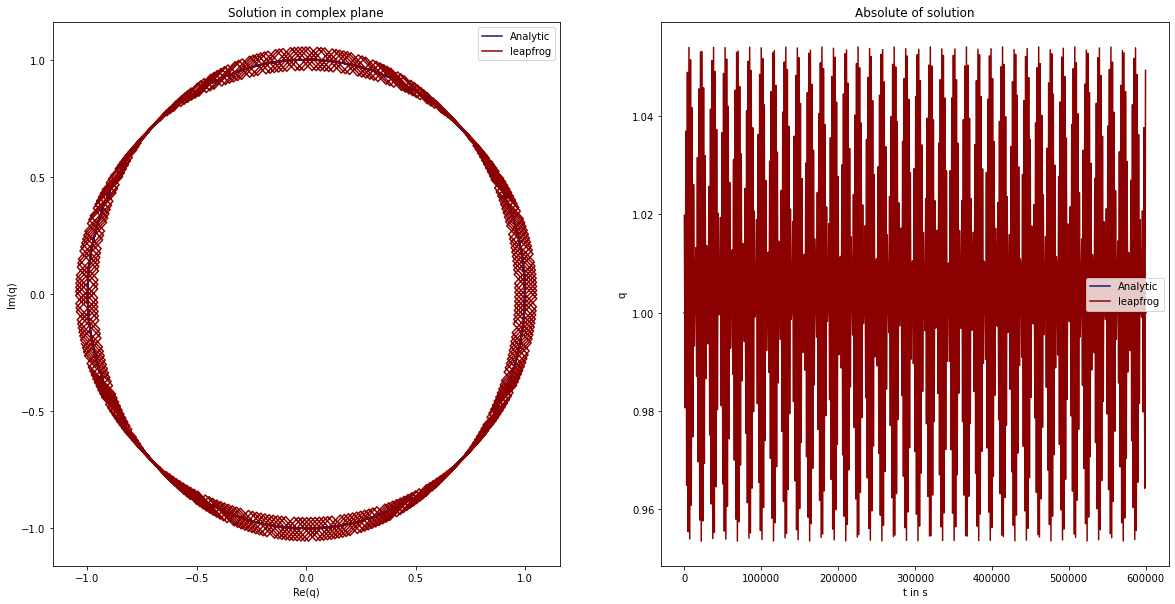

In [12]:
q.dt = 1000
q.N  = int(600000/q.dt)
q.solve(method='fw_euler')
q.plot_sol()
q.solve(method='bw_euler')
q.plot_sol()
q.solve(method='leapfrog')
q.plot_sol()

The solutions for varying time stepping show the same - but amplified - characteristics. For the Euler methods, the unstable growing and damping change drastically. The solution grows to different orders of magnitude ($~10^{5}$ !) when the time stepping is multiplied by 10. 
The physical mode of the solution obtained by the Leapfrog scheme stays neutral. The amplitude of the computational mode changes with $\Delta t$. A ten times larger step size also yields a ten times larger amplitude limiting the computational mode of $5\cdot 10^{-2}$.

In [3]:
class Linear_Solver:
    def __init__(self, RHS, y0, params = None):
        if params is None:
            params  = {'N': 6000, 'dt': 100}
        self.dt  = params['dt']
        self.N  = params['N']
        self.RHS = RHS
        self.y0  = y0
        self.keywords()
    
    def keywords(self):
        self.key_dict = {'fw_euler': self.Euler_foreward,'bw_euler': self.Euler_backward,'leapfrog': self.Leap_frog}
    
    def Euler_foreward(self,q_0):
        q_1 = (1+2*self.dt*self.RHS)*q_0
        return(q_1)

    def Euler_backward(self,q_0):
        q_1 = q_0/(1-self.dt*self.RHS)
        return(q_1)

    def Leap_frog(self,q_01):
        q_2 = self.onestep+2*self.dt*self.RHS*q_01
        self.onestep = q_01
        return(q_2)
    
    def analytic(self):
        return(self.y0*np.exp(self.RHS*self.t))     

    def solve(self,method='fw_euler', N=None, dt=None):
        
        if N is not None:
            self.N  = N
        if dt is not None:
            self.dt = dt
        
        if method is 'leapfrog':
            self.onestep = self.y0
            y = [self.Euler_foreward(self.y0)]
        else:
            y = [self.y0] 
                    
        scheme = self.key_dict[method]
        t = [0]
        for i in range(self.N):
            step = scheme(y[i])
            y.append(step)
            t.append(t[i]+self.dt)
        self.sol = np.array(y)
        self.t   = np.array(t)
        self.an  = self.analytic()
        self.method = method
        if method is 'leap_frog':
            self.sol 
    
    def plot_sol(self):
        plt.figure(figsize=(20,10))
        plt.subplot(1, 2, 1)
        plt.plot(self.an.real,self.an.imag , color='midnightblue', linestyle='-',label='Analytic')
        plt.plot(self.sol.real,self.sol.imag , color='darkred', label=self.method)
        plt.title('Solution in complex plane')
        plt.ylabel(r'Im(q)')
        plt.xlabel(r'Re(q)')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.t,abs(self.an) , color='midnightblue', linestyle='-',label='Analytic')
        plt.plot(self.t,abs(self.sol) , color='darkred', label=self.method)
        plt.title('Absolute of solution')
        plt.xlabel(r't in s')
        plt.ylabel(r'q')
        plt.legend()
        plt.show()
        